In [1]:
# modified to work in 3D

In [2]:
from random import random, randint
from math import exp, log
# import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
N = 128
S = 10**5

class SAW:
    xMoves = [1,-1,0,0,0,0]
    yMoves = [0,0,1,-1,0,0]
    zMoves = [0,0,0,0,1,-1]

    def __init__(self):
        self.length = 0
        self.walk = [(0,0,0)]
        self.occupied = set()
        self.occupied.add((0,0,0))

    def doMove(self):
        xn,yn,zn = self.walk[-1] #last vertex
        c = randint(0,5)
        xn += SAW.xMoves[c]
        yn += SAW.yMoves[c]
        zn += SAW.zMoves[c]

        if self.length == 0: #cannot delete
            self.addStep((xn,yn,zn))
        else:
            if (xn,yn,zn) == self.walk[-2]:
                self.deleteStep() #immediate reversal
            else:
                self.addStep( (xn,yn,zn) )

    def deleteStep(self):
        if log(random()) > G[self.length]-G[self.length-1]:
            return
        x,y,z = self.walk.pop()
        self.occupied.remove( (x,y,z) )
        self.length -= 1

    def addStep(self, p):
        if self.length == N or log(random()) > G[self.length]-G[self.length+1]:
            return

        if p not in self.occupied :
            self.walk.append(p)
            self.occupied.add(p)
            self.length += 1
            
    def preparePlot(self):
        xs = []
        ys = []
        zs = []
        for vert in self.walk:
            xs.append(vert[0])
            ys.append(vert[1])
            zs.append(vert[2])
        return xs, ys, zs

counts = [0 for i in range(N+1)] #total samples
H = [0 for k in range(N+1)] #running histogram
G = [0 for k in range(N+1)] #G-distribution
f = 1 #G-incrementer

def flatten():
    global f,H,G
    r = min(H)/max(H)
    if r>0.9: #time to reduce f
        f = f/2
        H = [0 for k in range(N+1)] #reset histogram
        g0 = G[0] 
        G = list(map(lambda X: X-g0, G) ) #avoid overflows
        print("Histogram is flat = ", r, "\tReduce f to ",f)
#     else:
#         print("Histogram not flat enough", r, "\tf left as ", f)

phi=SAW()

while f > 0.0001:
    for s in range(S):
        phi.doMove()
        if s%17==0 :
            counts[phi.length] += 1
            G[phi.length] += f
            H[phi.length] += 1
    flatten()

while phi.length < 128:
    phi.doMove()

Histogram is flat =  0.9027099067081297 	Reduce f to  0.5
Histogram is flat =  0.9099099099099099 	Reduce f to  0.25
Histogram is flat =  0.9080675422138836 	Reduce f to  0.125
Histogram is flat =  0.9032258064516129 	Reduce f to  0.0625
Histogram is flat =  0.9036458333333334 	Reduce f to  0.03125
Histogram is flat =  0.9131578947368421 	Reduce f to  0.015625
Histogram is flat =  0.9214092140921409 	Reduce f to  0.0078125
Histogram is flat =  0.900518134715026 	Reduce f to  0.00390625
Histogram is flat =  0.9080947331212442 	Reduce f to  0.001953125
Histogram is flat =  0.9001555209953344 	Reduce f to  0.0009765625
Histogram is flat =  0.9000261028452101 	Reduce f to  0.00048828125
Histogram is flat =  0.9003649056005077 	Reduce f to  0.000244140625
Histogram is flat =  0.9034180869889168 	Reduce f to  0.0001220703125
Histogram is flat =  0.9099397590361445 	Reduce f to  6.103515625e-05


In [4]:
xs,ys,zs = phi.preparePlot()

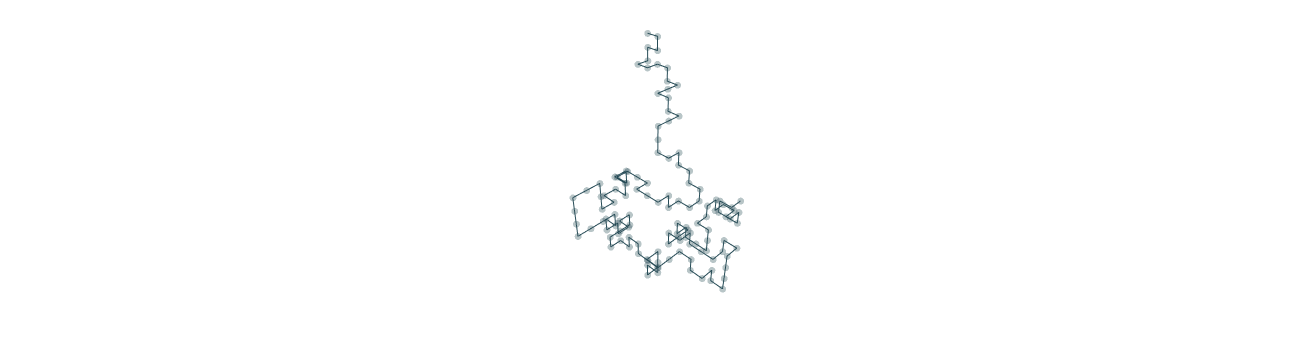

In [7]:
fig = go.Figure(data=[go.Scatter3d(x=xs, y=ys, z=zs,
                                    mode='lines+markers',
                                    marker=dict(color="#264B56", size=4, opacity=0.33))])
fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False)
fig.update_layout(width=270, height=270, autosize=False, margin=dict(l=0, r=0, b=0, t=0))

In [8]:
fig.write_html("saw_3d.html", full_html=False, include_plotlyjs='cdn')